# Maria Luisa Monteiro Seixo de Brito
## maludebrito@gmail.com


# marialmsb@al.insper.edu.br

* Leia o arquivo "desafio.csv" na pasta data
* Obtenha as variáveis X e y no dataset
* Inicialize (e deixe bem claro onde fez isso) os parâmetros de seu modelo:
    * Learning rate;
    * Número de iterações;
    * Número de amostras;
    * $\theta_0$ e $\theta_1$ iniciais, gerados aleatoriamente.
* Desenvolva a função que calcula EQM
* Desenvolva uma (ou duas) funções que devolva a derivada parcial de EQM para cada um dos $\theta$
* Desenvolva a função que itera $\theta_0$ e $\theta_1$ e devolva os valores finais
* Plote um gráfico contendo:
* Os valores reais de X e y
* A reta formada pelos valores de $\theta$ encontrados por você

In [4]:
# Primeiramente, é necessário importar a base de dados
import pandas as pd
df = pd.read_table(".\desafio.csv", delimiter =",")
print(df.head())
type(df)

   Unnamed: 0         X         y
0           0  1.941499 -2.867797
1           1  3.033204 -0.793799
2           2  3.541302  0.679486
3           3  2.486183 -3.625006
4           4  3.739032 -0.607250


pandas.core.frame.DataFrame

In [5]:
# Aqui fiz uma pequna limpeza e organizei os dados de acordo com nomes que para mim são mais intuitivos
df=df.rename(columns={"Unnamed: 0": "contagem", "X": "x","y":"y"})
print(df.head(3))
del df["contagem"]


   contagem         x         y
0         0  1.941499 -2.867797
1         1  3.033204 -0.793799
2         2  3.541302  0.679486


In [6]:
print(df.head(10))
df.describe()

          x         y
0  1.941499 -2.867797
1  3.033204 -0.793799
2  3.541302  0.679486
3  2.486183 -3.625006
4  3.739032 -0.607250
5  1.645022 -4.843508
6  1.054859 -3.944305
7  2.556042 -0.332324
8  2.146848 -0.207326
9  3.036577 -0.713097


,x,y
count,100.000000,100.000000
mean,2.573279,-1.899961
std,1.412399,3.075679
min,0.032438,-8.313625
25%,1.398731,-4.173605
50%,2.786098,-1.505000
75%,3.688278,0.573354
max,4.988527,4.236273


#### Definição dos arrays:

In [7]:
# Definição dos datasets:
x = df.iloc[:, 0]
print(x)
y = df.iloc[:, 1]
print(y)

0     1.941499
1     3.033204
2     3.541302
3     2.486183
4     3.739032
        ...   
95    0.769992
96    0.608491
97    4.504056
98    3.639574
99    2.084952
Name: x, Length: 100, dtype: float64
0    -2.867797
1    -0.793799
2     0.679486
3    -3.625006
4    -0.607250
        ...   
95   -6.145741
96   -6.347823
97    3.440869
98    0.893604
99   -0.475449
Name: y, Length: 100, dtype: float64


### Aqui começa a etapa da regressão linear

In [8]:
print(len(df)) 
# Inicialmente, é importante notar que temos 100 dados
df.isnull().sum()
# Sendo que não há nem um missing e, logo, que temos o mesmo número de dados tanto pra x quanto pra y

100


x    0
y    0
dtype: int64

In [428]:
# Além disso, plotar um gráfico é importante para ver como x e y se relacionam e, logo, para definir como trabalhar com essas variáveis


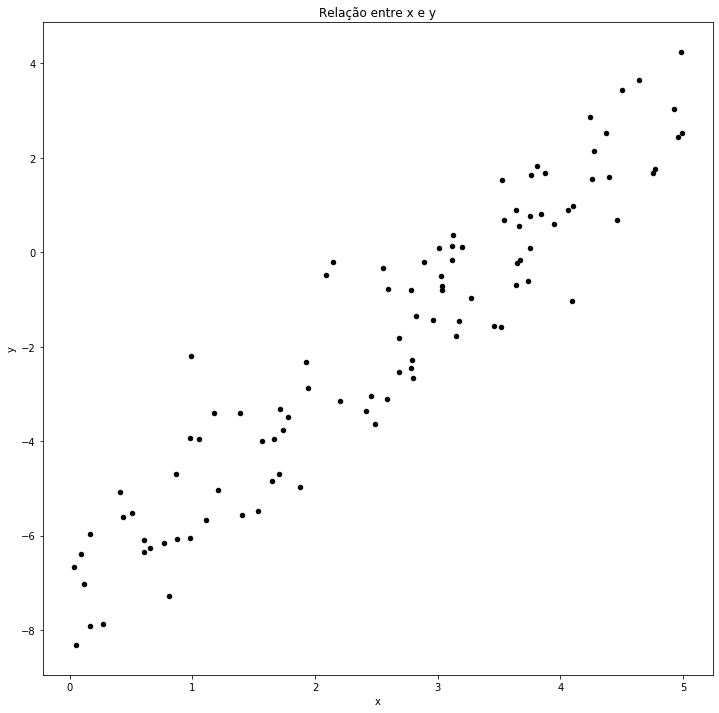

In [10]:
df.plot.scatter(x='x',y='y',color="black",figsize=(12,12),title="Relação entre x e y")
# A partir do gráfico acima fica claro a relação linear entre x e y

##### A partir do gráfico acima, decidi definir:
* X como a variável independente
* Y como a variável dependente

##### Apenas relembrando que o objetivo a partir da definição dessas variáveis é encontrar a reta a seguir:
$ Y = \theta_1  X + \theta_0 $

##### Vou definir meu Learning Rate como sendo igual a 0.001 


In [55]:
l=0.0001 # learning rate

##### Agora, vou definir o número de iterações:

In [56]:
iterações = 1000

##### Geração aleatória do $\theta_1$ e $\theta_0$:

In [57]:
import random
random.seed(5749)
slope=random.uniform(1,3.5) # Defini o intervalo entre 0.5 e 5, pois a partir do gráfico não achei que fosse necessário considerar um "slope" negativo. Além disso, definindo um intervalo menor tenho mais chances de chegar em um resultado melhor. Finalmente, nota-se uma forte inclinação no gráfico.
print(slope)
intercepto=random.uniform(-9.5,-6) # Também partindo do gráfico vi que o ponto de intercepto seria negativo. Além disso, ele parece estar próximo de -8, mas com medo de perder algum ponto decidi optar por colocar o intervalo entre -9.5 e -6
print(intercepto)

2.861390628236701
-9.22320045294548


##### Número de amostras:

In [58]:
df.describe() # Como já tinha sido previamente confirmado temos 100 amostras de x e y

,x,y
count,100.000000,100.000000
mean,2.573279,-1.899961
std,1.412399,3.075679
min,0.032438,-8.313625
25%,1.398731,-4.173605
50%,2.786098,-1.505000
75%,3.688278,0.573354
max,4.988527,4.236273


### Cálculo do EQM: $ EQM= \frac{1}{m}\sum_{i=1}^{m}(\theta_1 x_i +\theta_0 - y_i)^2 $, lembrando que m=100

In [59]:
def calcula_eqm(slope,intercepto,x,y):
    y_predict = slope * x + intercepto
    eqm=(1/len(y))*sum((y_predict-y)**2)
    print(eqm)

calcula_eqm(slope,intercepto,x,y)        

2.325673296696933


##### Derivada parcial da inclinação da curva ("slope"): $D_m = \frac{-2}{m} \sum_{i=1}^{m} x_i(y_i -\overline{y_i})$
##### Derivada parcial do intercepto: $D_c = \frac{-2}{m} \sum_{i=1}^{m}(y_i-\overline{y_i})$


In [60]:
def derivada_slope(slope,intercepto,x,y):
        y_predict = slope * x + intercepto
        derivada_slope= (-2/len(y))* sum(x * (y_predict-y))
        derivada_slope
        print(derivada_slope)

def derivada_intercepto(slope,intercepto,x,y):
    y_predict = slope * x + intercepto
    derivada_intercepto=(-2/len(y)) * sum(y_predict-y)
    print(derivada_intercepto)

derivada_slope(slope,intercepto,x,y)
derivada_intercepto(slope,intercepto,x,y)
a=-3.3957325695935725 #Por algum motivo meu código estava dando Nonetype quando eu tentava usar a função que criei para fazer alguma conta, a fim de continuar o projeto fiz esse ctrl+c e ctrl+v, visto que não fui capaz de achar solução melhor 
b=-0.07983577639711359

-3.3957325695935725
-0.07983577639711359


##### Processo de iteração: $\theta_{i+1}=\theta_i-\mu \frac{\partial}{\partial(\theta)}EQM$ 

In [61]:
for i in range(iterações):
    slope = slope - l*a #update derivada da inclinação
    if slope <3:
        break
    elif slope>3.5:
        break
    else:
        continue
    
print(slope)

2.8617302014936605


In [62]:
for i in range(iterações):
    intercepto = intercepto - l*a #update derivada da inclinação
    if intercepto<-9:
        break
    else:
        continue
    
print(intercepto)

-9.222860879688522


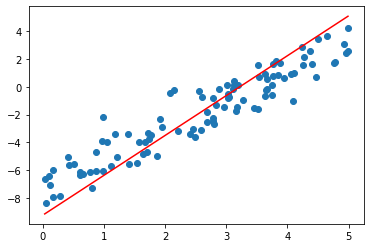

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

predição = slope*x + intercepto

plt.scatter(x, y)
plt.plot([min(x), max(x)], [min(predição), max(predição)], color='red') # predicted
plt.show()

### Sendo importante lembrar que $\theta_1=2.86$ e $\theta_0=-9.22$